In [1]:
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
import numpy as np
import scipy.io
import skimage as ski

In [2]:
vp = np.load('./mar_vp.npy')
vs = np.load('./mar_vs.npy')

vp = vp[10:,:]
vs = vs[10:,:]

sigma = 1
vp = ski.filters.gaussian(vp, sigma)
vs = ski.filters.gaussian(vs, sigma)

vp_noi = vp + np.random.uniform(-1,1,size=(vp.shape[0],vp.shape[1]))*0.2
vs_noi = vs + np.random.uniform(-1,1,size=(vs.shape[0],vs.shape[1]))*0.1

print(vp.shape)
nz = vp.shape[0]
nx = vp.shape[1]

zmin = 0.; dz = 0.025; zmax = (nz-1)*dz;
xmin = 0.; dx = 0.025; xmax = (nx-1)*dx;

ns = 20
ds = 0.5

sx = np.round(np.arange(0.25, (ns+1)*0.5,ds),2);
sz = np.zeros(sx.shape)

rz1 = np.round(np.arange(0,zmax+dz,dz),2)
rx1 = np.zeros(rz1.shape)

rz2 = np.round(np.arange(0,zmax+dz,dz),2)
rx2 = xmax*np.ones(rz2.shape)



(121, 426)


In [3]:
print(np.random.uniform(-1,1,size=(1,10)))

[[-0.496035   -0.43133515 -0.32357507  0.56020726 -0.50007467 -0.32223647
   0.95373035  0.18461132 -0.47560556 -0.0423305 ]]


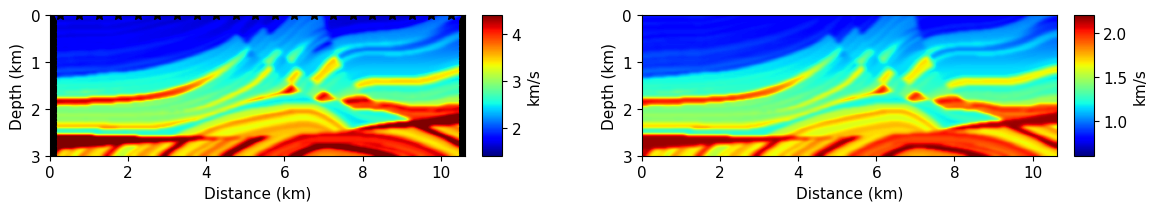

In [4]:
font_size = 11

plt.figure(figsize=(14,8))
plt.subplot(1,2,1)
ax = plt.gca()
im = ax.imshow(vp, extent=[xmin,xmax,zmax,zmin], aspect=1.2, cmap="jet")
ax.plot(sx,sz,'k*',markersize=8)
ax.plot(rx2,rz2,'k^',markersize=8)
ax.plot(rx1,rz1,'k^',markersize=8)

plt.xlabel('Distance (km)', fontsize=font_size)
plt.xticks(fontsize=font_size)

plt.ylabel('Depth (km)', fontsize=font_size)
plt.yticks(fontsize=font_size)

#ax.xaxis.set_major_locator(plt.MultipleLocator(0.5))
#ax.yaxis.set_major_locator(plt.MultipleLocator(0.5))

divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="4%", pad=-0.25)

cbar = plt.colorbar(im, cax=cax)

cbar.mappable.set_clim(1.4,4.4)

cbar.set_label('km/s',size=font_size)
cbar.ax.tick_params(labelsize=font_size)

plt.subplot(1,2,2)
ax = plt.gca()
im = ax.imshow(vs, extent=[xmin,xmax,zmax,zmin], aspect=1.2, cmap="jet")

plt.xlabel('Distance (km)', fontsize=font_size)
plt.xticks(fontsize=font_size)

plt.ylabel('Depth (km)', fontsize=font_size)
plt.yticks(fontsize=font_size)

#ax.xaxis.set_major_locator(plt.MultipleLocator(0.5))
#ax.yaxis.set_major_locator(plt.MultipleLocator(0.5))

divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="4%", pad=-0.25)

cbar = plt.colorbar(im, cax=cax)

cbar.mappable.set_clim(0.6,2.2)

cbar.set_label('km/s',size=font_size)
cbar.ax.tick_params(labelsize=font_size)

plt.savefig("./Fig/mar_vp_vs_pred_tomo_vsp_true.jpeg", format='jpeg', bbox_inches="tight",dpi=400)

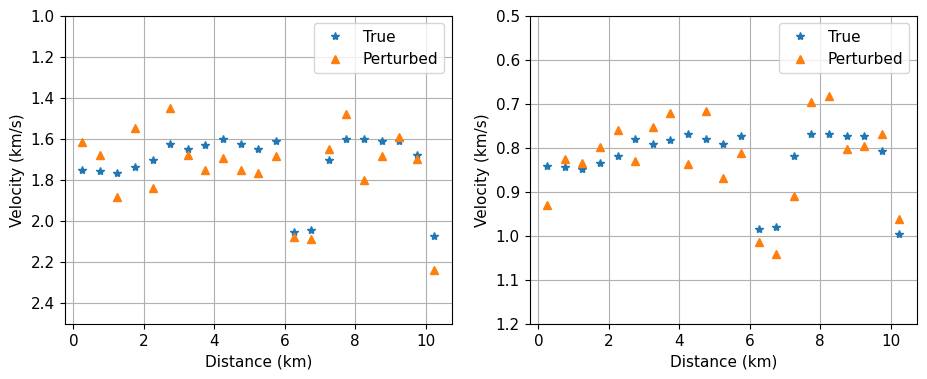

In [5]:
x = np.arange(xmin,xmax+dx,dx)
depth = 0

plt.style.use('default')

plt.figure(figsize=(11,4))
plt.subplot(1,2,1)

plt.plot(x[10::20],vp[depth,10::20],'*')
plt.plot(x[10::20],vp_noi[depth,10::20],'^')

plt.ylabel('Velocity (km/s)', fontsize=font_size)
plt.yticks(fontsize=font_size)
plt.ylim([1.0,2.5])

plt.xlabel('Distance (km)', fontsize=font_size)
plt.xticks(fontsize=font_size)


plt.gca().invert_yaxis()

plt.legend(['True','Perturbed'],fontsize=font_size)

plt.grid()

plt.subplot(1,2,2)

plt.plot(x[10::20],vs[depth,10::20],'*')
plt.plot(x[10::20],vs_noi[depth,10::20],'^')

plt.ylabel('Velocity (km/s)', fontsize=font_size)
plt.yticks(fontsize=font_size)
plt.ylim([0.5,1.2])

plt.xlabel('Distance (km)', fontsize=font_size)
plt.xticks(fontsize=font_size)


plt.gca().invert_yaxis()

plt.legend(['True','Perturbed'],fontsize=font_size)

plt.grid()

plt.savefig("./Fig/mar_V_perturbed.jpeg", format='jpeg', bbox_inches="tight",dpi=400)

In [6]:
vp_new = np.load('./vp_pred_mar_tomo_vsp_new.npy')
vs_new = np.load('./vs_pred_mar_tomo_vsp_new.npy')

vp_ori = np.load('./vp_pred_mar_tomo_vsp_ori.npy')
vs_ori = np.load('./vs_pred_mar_tomo_vsp_ori.npy')


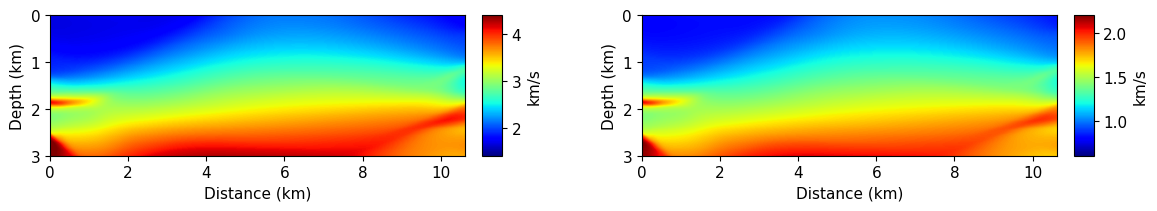

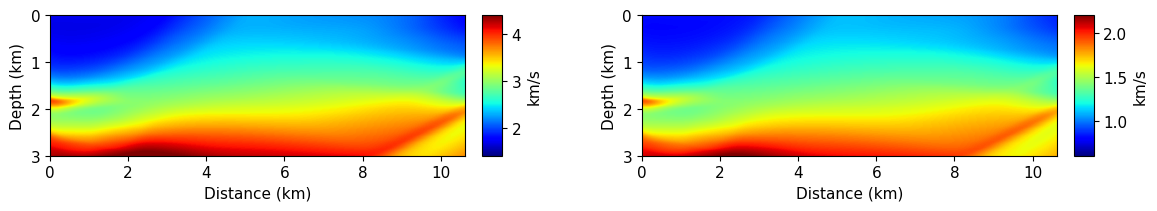

In [7]:
# Plot the velocity model with the source location
plt.style.use('default')

plt.figure(figsize=(14,8))
plt.subplot(1,2,1)
ax = plt.gca()
im = ax.imshow(vp_new[:,:,0], extent=[xmin,xmax,zmax,zmin], aspect=1.2, cmap="jet")

plt.xlabel('Distance (km)', fontsize=font_size)
plt.xticks(fontsize=font_size)

plt.ylabel('Depth (km)', fontsize=font_size)
plt.yticks(fontsize=font_size)

#ax.xaxis.set_major_locator(plt.MultipleLocator(0.5))
#ax.yaxis.set_major_locator(plt.MultipleLocator(0.5))

divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="4%", pad=-0.25)

cbar = plt.colorbar(im, cax=cax)

cbar.mappable.set_clim(1.4,4.4)

cbar.set_label('km/s',size=font_size)
cbar.ax.tick_params(labelsize=font_size)
plt.subplot(1,2,2)
ax = plt.gca()
im = ax.imshow(vs_new[:,:,0], extent=[xmin,xmax,zmax,zmin], aspect=1.2, cmap="jet")

plt.xlabel('Distance (km)', fontsize=font_size)
plt.xticks(fontsize=11)

plt.ylabel('Depth (km)', fontsize=font_size)
plt.yticks(fontsize=font_size)

#ax.xaxis.set_major_locator(plt.MultipleLocator(0.5))
#ax.yaxis.set_major_locator(plt.MultipleLocator(0.5))

divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="4%", pad=-0.25)

cbar = plt.colorbar(im, cax=cax)

cbar.mappable.set_clim(0.6,2.2)

cbar.set_label('km/s',size=font_size)
cbar.ax.tick_params(labelsize=font_size)

plt.savefig("./Fig/mar_vp_vs_pred_tomo_vsp_new.jpeg", format='jpeg', bbox_inches="tight",dpi=400)

plt.figure(figsize=(14,8))
plt.subplot(1,2,1)
ax = plt.gca()
im = ax.imshow(vp_ori[:,:,0], extent=[xmin,xmax,zmax,zmin], aspect=1.2, cmap="jet")

plt.xlabel('Distance (km)', fontsize=font_size)
plt.xticks(fontsize=font_size)

plt.ylabel('Depth (km)', fontsize=font_size)
plt.yticks(fontsize=font_size)

#ax.xaxis.set_major_locator(plt.MultipleLocator(0.5))
#ax.yaxis.set_major_locator(plt.MultipleLocator(0.5))

divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="4%", pad=-0.25)

cbar = plt.colorbar(im, cax=cax)

cbar.mappable.set_clim(1.4,4.4)

cbar.set_label('km/s',size=font_size)
cbar.ax.tick_params(labelsize=font_size)
plt.subplot(1,2,2)
ax = plt.gca()
im = ax.imshow(vs_ori[:,:,0], extent=[xmin,xmax,zmax,zmin], aspect=1.2, cmap="jet")

plt.xlabel('Distance (km)', fontsize=font_size)
plt.xticks(fontsize=font_size)

plt.ylabel('Depth (km)', fontsize=font_size)
plt.yticks(fontsize=font_size)

#ax.xaxis.set_major_locator(plt.MultipleLocator(0.5))
#ax.yaxis.set_major_locator(plt.MultipleLocator(0.5))

divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="4%", pad=-0.25)

cbar = plt.colorbar(im, cax=cax)

cbar.mappable.set_clim(0.6,2.2)

cbar.set_label('km/s',size=font_size)
cbar.ax.tick_params(labelsize=font_size)

plt.savefig("./Fig/mar_vp_vs_pred_tomo_vsp_ori.jpeg", format='jpeg', bbox_inches="tight",dpi=400)

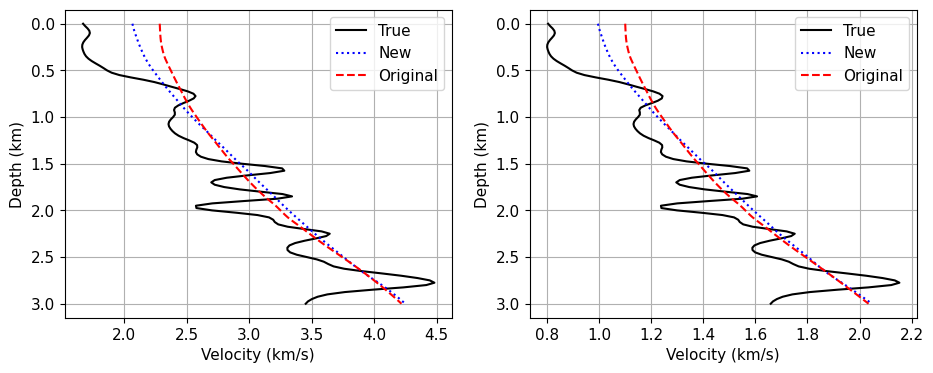

In [8]:
z = np.arange(zmin,zmax+dz,dz)
trace = 200

plt.style.use('default')

plt.figure(figsize=(11,4))
plt.subplot(1,2,1)

plt.plot(vp[:,trace],z,'k-')
plt.plot(vp_new[:,trace,0],z,'b:')
plt.plot(vp_ori[:,trace,0],z,'r--')

plt.xlabel('Velocity (km/s)', fontsize=font_size)
plt.xticks(fontsize=font_size)

plt.ylabel('Depth (km)', fontsize=font_size)
plt.yticks(fontsize=font_size)


plt.gca().invert_yaxis()

plt.legend(['True','New','Original'],fontsize=font_size)

plt.grid()

plt.subplot(1,2,2)

plt.plot(vs[:,trace],z,'k-')
plt.plot(vs_new[:,trace,0],z,'b:')
plt.plot(vs_ori[:,trace,0],z,'r--')


plt.xlabel('Velocity (km/s)', fontsize=font_size)
plt.xticks(fontsize=font_size)

plt.ylabel('Depth (km)', fontsize=font_size)
plt.yticks(fontsize=font_size)
plt.gca().invert_yaxis()

plt.legend(['True','New','Original'],fontsize=font_size)

plt.grid()

plt.savefig("./Fig/mar_V_trace_tomo200.jpeg", format='jpeg', bbox_inches="tight",dpi=400)

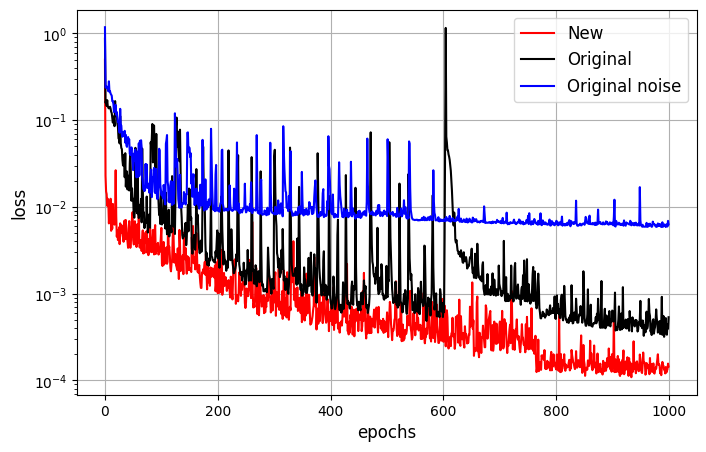

In [9]:
epoch_num = 1000
loss_tomo_new = np.load('./Fig/loss_tomo_mar_vsp_new%d.npy'%(epoch_num))
loss_tomo_ori = np.load('./Fig/loss_tomo_mar_vsp_ori%d.npy'%(epoch_num))
loss_tomo_ori_noi = np.load('./Fig/loss_tomo_mar_vsp_ori_noi%d.npy'%(epoch_num))

plt.style.use('default')

plt.figure(figsize=(8,5))

ax = plt.gca()
plt.semilogy(loss_tomo_new[::1],'r')
plt.semilogy(loss_tomo_ori[::1],'k')
plt.semilogy(loss_tomo_ori_noi[::1],'b')

plt.xlabel('epochs', fontsize=12)
plt.ylabel('loss', fontsize=12)
plt.legend(['New','Original','Original noise'], fontsize=12)
plt.grid()
plt.savefig("./Fig/loss_comp_mar_vsp_random_noi.jpeg", format='jpeg', bbox_inches="tight",dpi=400)

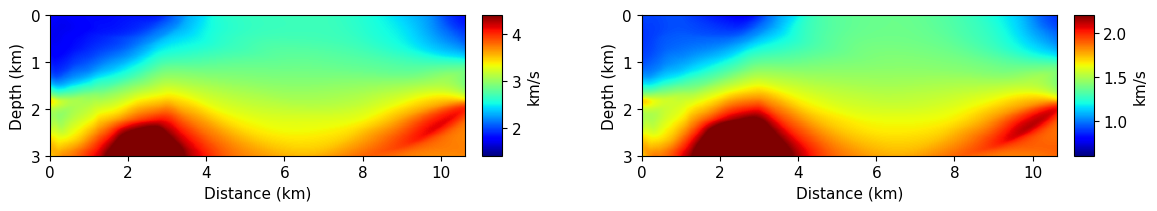

In [10]:
vp_ori = np.load('./vp_pred_mar_tomo_vsp_ori_noi.npy')
vs_ori = np.load('./vs_pred_mar_tomo_vsp_ori_noi.npy')

plt.figure(figsize=(14,8))
plt.subplot(1,2,1)
ax = plt.gca()
im = ax.imshow(vp_ori[:,:,0], extent=[xmin,xmax,zmax,zmin], aspect=1.2, cmap="jet")

plt.xlabel('Distance (km)', fontsize=font_size)
plt.xticks(fontsize=font_size)

plt.ylabel('Depth (km)', fontsize=font_size)
plt.yticks(fontsize=font_size)

#ax.xaxis.set_major_locator(plt.MultipleLocator(0.5))
#ax.yaxis.set_major_locator(plt.MultipleLocator(0.5))

divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="4%", pad=-0.25)

cbar = plt.colorbar(im, cax=cax)

cbar.mappable.set_clim(1.4,4.4)

cbar.set_label('km/s',size=font_size)
cbar.ax.tick_params(labelsize=font_size)
plt.subplot(1,2,2)
ax = plt.gca()
im = ax.imshow(vs_ori[:,:,0], extent=[xmin,xmax,zmax,zmin], aspect=1.2, cmap="jet")

plt.xlabel('Distance (km)', fontsize=font_size)
plt.xticks(fontsize=font_size)

plt.ylabel('Depth (km)', fontsize=font_size)
plt.yticks(fontsize=font_size)

#ax.xaxis.set_major_locator(plt.MultipleLocator(0.5))
#ax.yaxis.set_major_locator(plt.MultipleLocator(0.5))

divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="4%", pad=-0.25)

cbar = plt.colorbar(im, cax=cax)

cbar.mappable.set_clim(0.6,2.2)

cbar.set_label('km/s',size=font_size)
cbar.ax.tick_params(labelsize=font_size)

plt.savefig("./Fig/mar_vp_vs_pred_tomo_vsp_ori_noi.jpeg", format='jpeg', bbox_inches="tight",dpi=400)

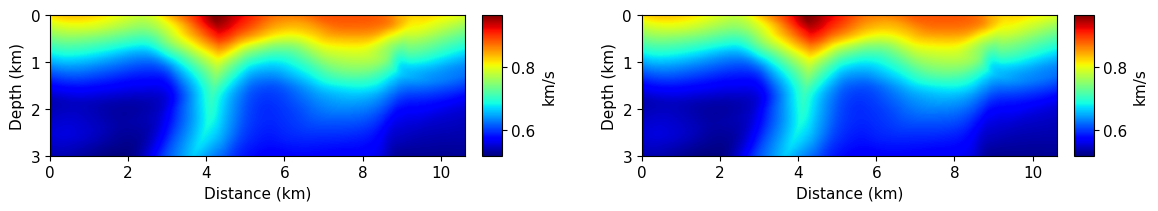

In [11]:
epoch_num = 1000
taup_pred = np.load('./mar_pinntomo_taup_pred_random_ori%d.npy'%(epoch_num))
taus_pred = np.load('./mar_pinntomo_taus_pred_random_ori%d.npy'%(epoch_num))


plt.figure(figsize=(14,8))
plt.subplot(1,2,1)
ax = plt.gca()
im = ax.imshow(taup_pred[:,:,10], extent=[xmin,xmax,zmax,zmin], aspect=1.2, cmap="jet")

plt.xlabel('Distance (km)', fontsize=font_size)
plt.xticks(fontsize=font_size)

plt.ylabel('Depth (km)', fontsize=font_size)
plt.yticks(fontsize=font_size)

#ax.xaxis.set_major_locator(plt.MultipleLocator(0.5))
#ax.yaxis.set_major_locator(plt.MultipleLocator(0.5))

divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="4%", pad=-0.25)

cbar = plt.colorbar(im, cax=cax)

# cbar.mappable.set_clim(1.4,4.4)

cbar.set_label('km/s',size=font_size)
cbar.ax.tick_params(labelsize=font_size)
plt.subplot(1,2,2)
ax = plt.gca()
im = ax.imshow(taus_pred[:,:,10], extent=[xmin,xmax,zmax,zmin], aspect=1.2, cmap="jet")

plt.xlabel('Distance (km)', fontsize=font_size)
plt.xticks(fontsize=font_size)

plt.ylabel('Depth (km)', fontsize=font_size)
plt.yticks(fontsize=font_size)

#ax.xaxis.set_major_locator(plt.MultipleLocator(0.5))
#ax.yaxis.set_major_locator(plt.MultipleLocator(0.5))

divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="4%", pad=-0.25)

cbar = plt.colorbar(im, cax=cax)

# cbar.mappable.set_clim(0.6,2.2)

cbar.set_label('km/s',size=font_size)
cbar.ax.tick_params(labelsize=font_size)

plt.savefig("./Fig/mar_tau_pred_tomo_vsp_ori.jpeg", format='jpeg', bbox_inches="tight",dpi=400)